In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import ExponentialSmoothing

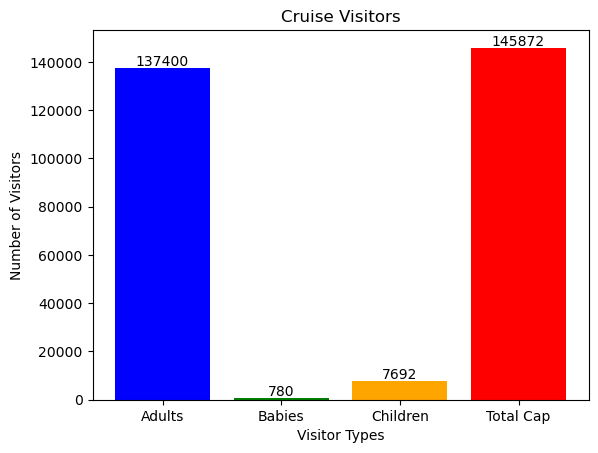

In [2]:
data = pd.read_csv('reservationsN.csv')

# Filter the DataFrame to include only rows where 'Stat' is "Check-Out"
checkouts = data[data['Stat'] == 'Check-Out']

# Calculate the sums for each column
sum_adults = int(checkouts['Adlt'].sum())
sum_babies = int(checkouts['BBY'].sum())
sum_children = int(checkouts['Chld'].sum())
total_visitors = int(checkouts['TotalRoomCap'].sum())

# Create lists for plotting
sum_types = ['Adults', 'Babies', 'Children', 'Total Cap']
sum_values = [sum_adults, sum_babies, sum_children, total_visitors]

# Create bar plot
plt.bar(sum_types, sum_values, color=['blue', 'green', 'orange', 'red'])

# Add values to bars
for i, value in enumerate(sum_values):
    plt.text(i, value + 1000, str(value), ha='center')

# Add labels and title
plt.xlabel('Visitor Types')
plt.ylabel('Number of Visitors')
plt.title('Cruise Visitors')

# Show plot
plt.show()

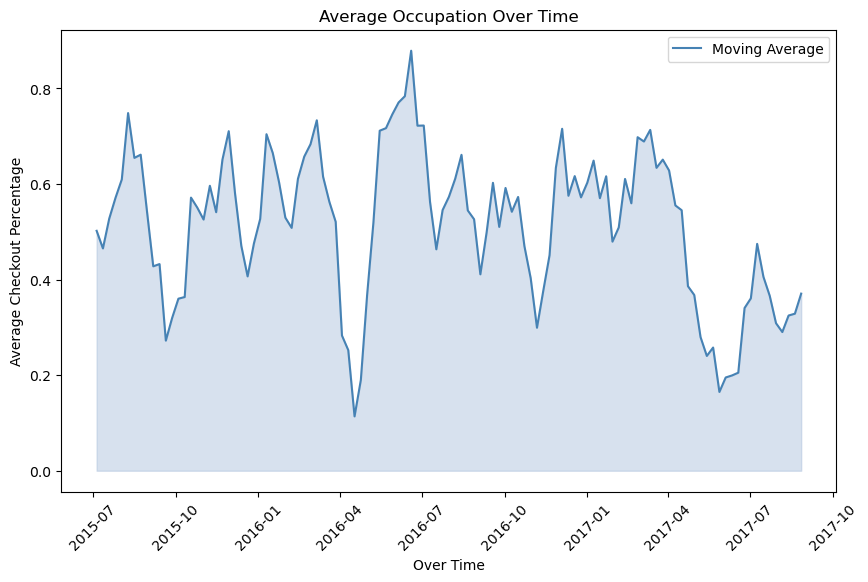

In [3]:
dates = pd.date_range(start='2015-06-08', end='2017-08-27', freq='W')
checkout_percentage = np.random.rand(len(dates))
data = pd.DataFrame({'Date': dates, 'CheckOutPercentage': checkout_percentage})

# Calculate moving average without creating a separate column
window_size = 4  # Adjust this value to change the window size for the moving average
moving_average = data['CheckOutPercentage'].rolling(window=window_size).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Date'], moving_average, color='steelblue', label='Moving Average')
ax.fill_between(data['Date'], moving_average, color='lightsteelblue', alpha=0.5)

# Set labels and title
ax.set_xlabel('Over Time')
ax.set_ylabel('Average Checkout Percentage')
ax.set_title('Average Occupation Over Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
ax.legend()

# Display the plot
plt.show()

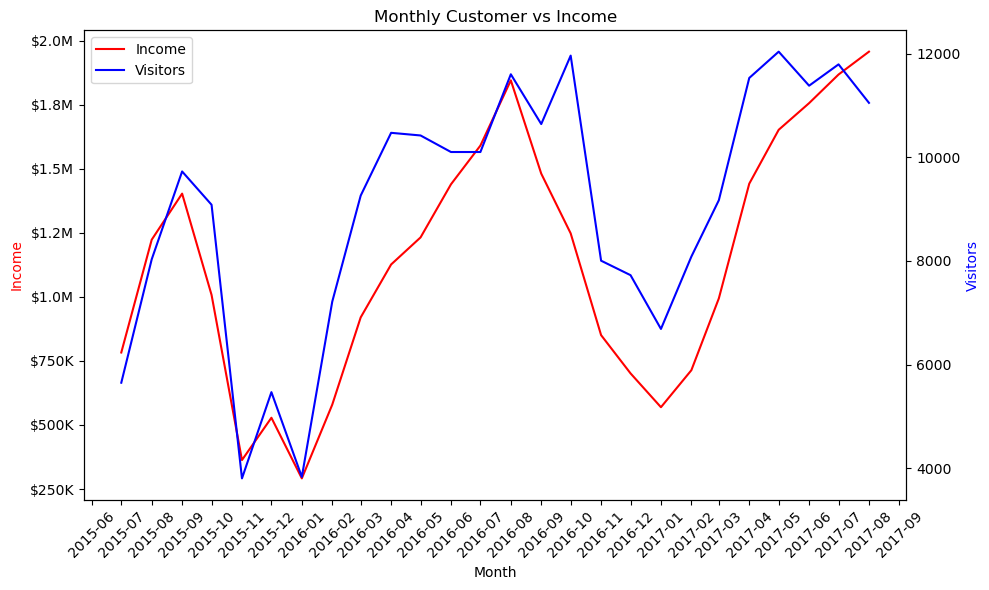

In [4]:
# Load the data
data = pd.read_csv('reservationsN.csv')

# Convert the 'CalculatedDate' to datetime
data['CalculatedDate'] = pd.to_datetime(data['CalculatedDate'])

# Extract month and year from 'CalculatedDate'
data['YearMonth'] = data['CalculatedDate'].dt.to_period('M')

# Group by month and calculate the sum of 'ThePaymentFilter' and 'TotalRoomCap'
monthly_totals = data.groupby('YearMonth').agg({'ThePaymentFilter': 'sum', 'TotalRoomCap': 'sum'}).reset_index()

# Convert YearMonth to datetime
monthly_totals['YearMonth'] = pd.to_datetime(monthly_totals['YearMonth'].astype(str))

# Assign columns to variables
monthly_dates = monthly_totals['YearMonth']
monthly_income = monthly_totals['ThePaymentFilter']
monthly_visitors = monthly_totals['TotalRoomCap']

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot monthly income on the primary y-axis
ax1.plot(monthly_dates, monthly_income, color="red", label="Income")
ax1.set_xlabel("Month")
ax1.set_ylabel("Income", color="red")

# Function to format the income as currency
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1e6:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

# Create a formatter
formatter = FuncFormatter(currency)

# Set the formatter
ax1.yaxis.set_major_formatter(formatter)

# Create a secondary y-axis for monthly visitors
ax2 = ax1.twinx()
ax2.plot(monthly_dates, monthly_visitors, color="blue", label="Visitors")
ax2.set_ylabel("Visitors", color="blue")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the x-axis to display all month-year labels
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='center')

# Redraw the figure to ensure it updates
fig.canvas.draw()

# Show the plot
plt.title('Monthly Customer vs Income')
plt.tight_layout()
plt.show()

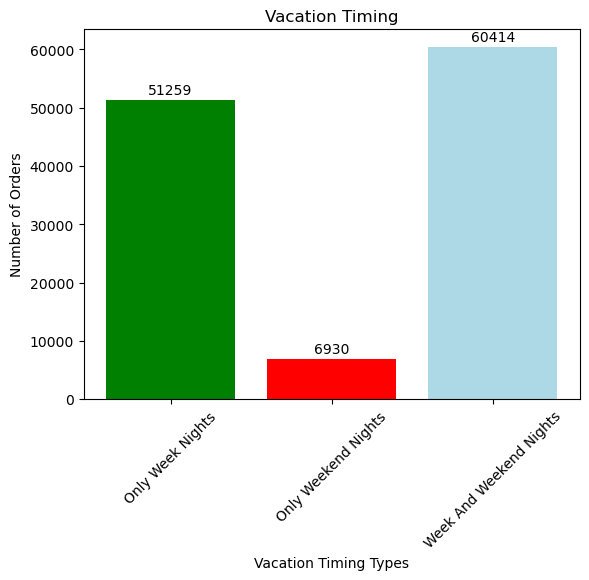

In [5]:
# Load the data
data = pd.read_csv('reservationsN.csv')

# Calculate the sums for each column
sum_week_nights = data['OnlyWeekNights'].sum()
sum_weekend_nights = data['OnlyWeekendNights'].sum()
sum_week_and_weekend_nights = data['WeekAndWeekendNights'].sum()

# Create lists for plotting
sum_types = ['Only Week Nights', 'Only Weekend Nights', 'Week And Weekend Nights']
sum_values = [sum_week_nights, sum_weekend_nights, sum_week_and_weekend_nights]

# Create bar plot
plt.bar(sum_types, sum_values, color=['green', 'red', 'lightblue'])

# Add values to bars
for i, value in enumerate(sum_values):
    plt.text(i, value + 1000, str(value), ha='center')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
    
# Add labels and title
plt.xlabel('Vacation Timing Types')
plt.ylabel('Number of Orders')
plt.title('Vacation Timing')

# Show plot
plt.show()

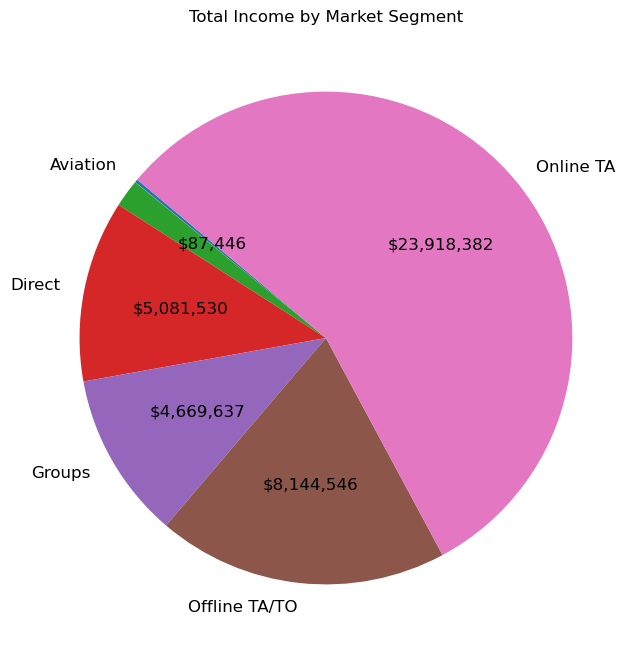

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Load the data
data = pd.read_csv('reservationsN.csv')

# Calculate total payment by market categories
total_payment_by_market = data.groupby('Market')['TotalPayment'].sum()

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = ax.pie(total_payment_by_market, labels=total_payment_by_market.index, autopct=lambda pct: '${:,.0f}'.format(pct/100 * sum(total_payment_by_market)), startangle=140)

# Change label font size and color
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')

# Change autopct font size and color
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')

# Function to check for overlaps and remove them
def remove_overlapping_labels(texts, ax):
    for i, text1 in enumerate(texts):
        if not text1.get_visible():
            continue
        bbox1 = text1.get_window_extent(renderer=ax.figure.canvas.get_renderer())
        for j, text2 in enumerate(texts):
            if i >= j or not text2.get_visible():
                continue
            bbox2 = text2.get_window_extent(renderer=ax.figure.canvas.get_renderer())
            if bbox1.overlaps(bbox2):
                text2.set_visible(False)

# Remove overlapping labels
remove_overlapping_labels(texts, ax)
remove_overlapping_labels(autotexts, ax)

# Add title
plt.title('Total Income by Market Segment')

# Show plot
plt.show()


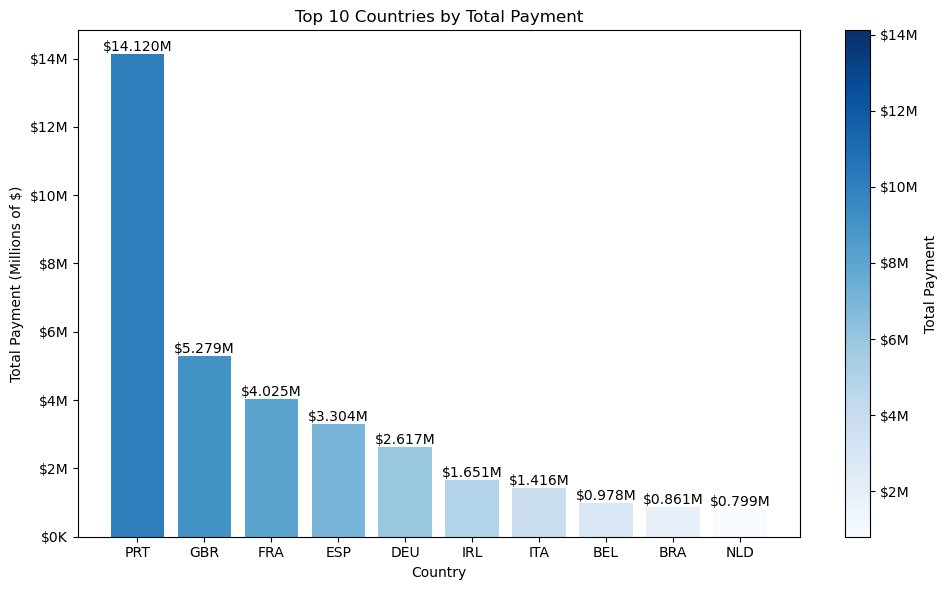

In [7]:
# Load the data
data = pd.read_csv('reservationsN.csv')

# Group by country and calculate total payment for each country
total_payment_by_country = data.groupby('Country')['TotalPayment'].sum()

# Sort the total payment in descending order and select the top 10 countries
top_10_countries = total_payment_by_country.sort_values(ascending=False).head(10)

# Plot the bar graph with gradient coloring
fig, ax = plt.subplots(figsize=(10, 6))

# Define a colormap with gradient from lighter to darker
colors = plt.cm.Blues(np.linspace(0.7, 0, len(top_10_countries)))

# Plot the bar graph with gradient coloring
bars = ax.bar(top_10_countries.index, top_10_countries.values, color=colors)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Total Payment (Millions of $)')
ax.set_title('Top 10 Countries by Total Payment')

# Function to format the income as currency
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1e6:
        return '${:.0f}M'.format(x*1e-6)
    return '${:.0f}K'.format(x*1e-3)

# Create a formatter for y-axis
y_formatter = FuncFormatter(currency)
ax.yaxis.set_major_formatter(y_formatter)

# Add color bar
norm = Normalize(vmin=min(top_10_countries.values), vmax=max(top_10_countries.values))
sm = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm.set_array([])  # fake up the array of the scalar mappable
cbar = plt.colorbar(sm, ax=ax, format=FuncFormatter(lambda x, _: '${:.0f}M'.format(x*1e-6)))
cbar.set_label('Total Payment')

# Add labels with TotalPayment for every country
for bar, payment in zip(bars, top_10_countries.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${:.3f}M'.format(payment*1e-6),
            ha='center', va='bottom', color='black')

# Show plot
plt.tight_layout()
plt.show()


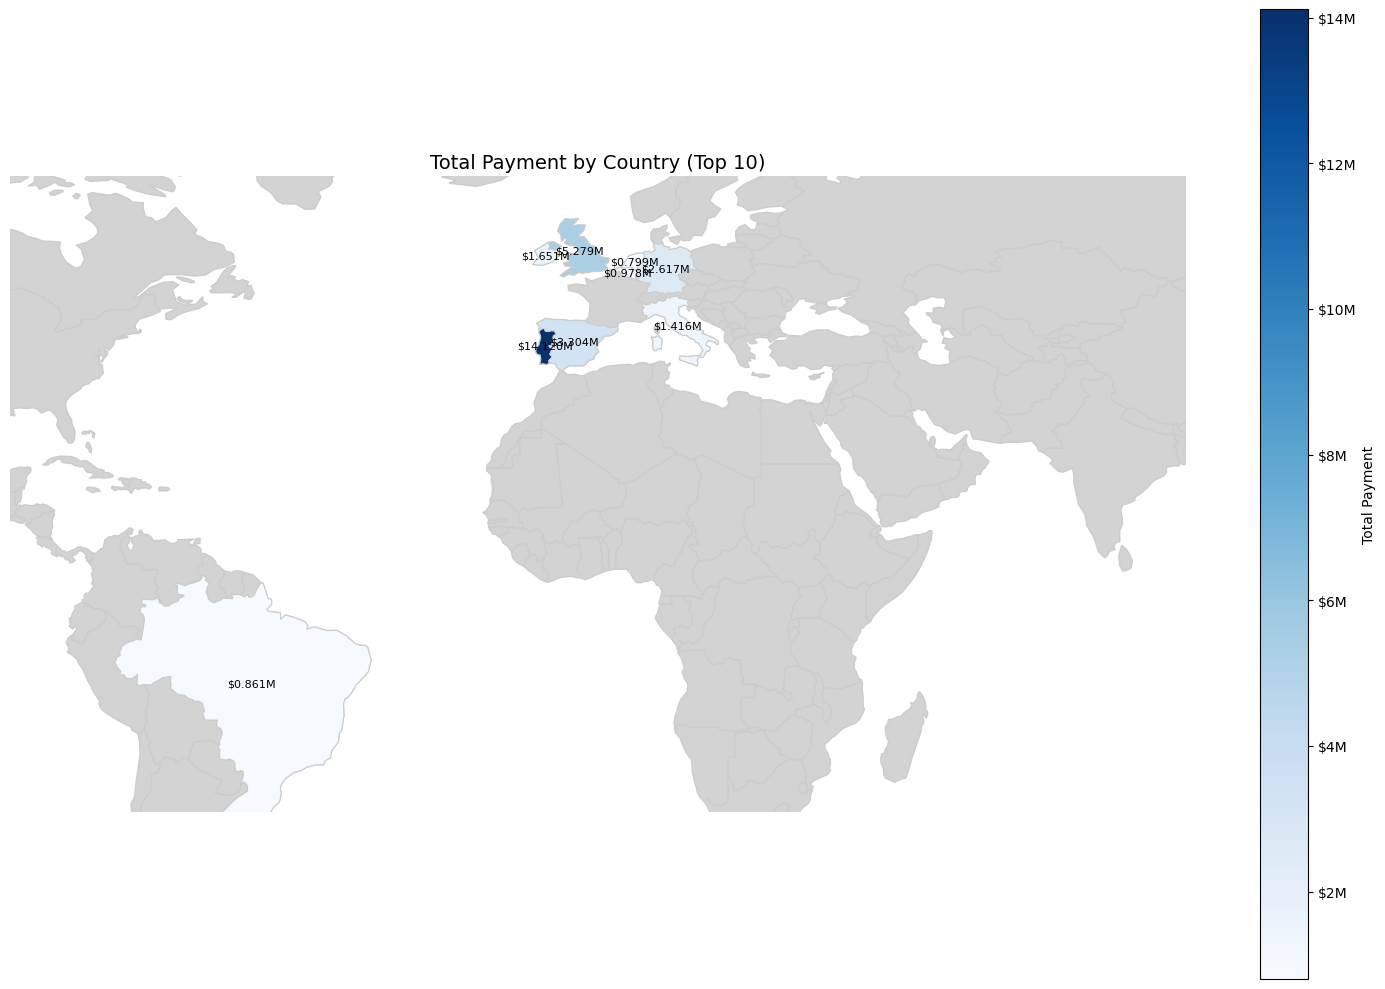

In [8]:
# Load the world map data
world = gpd.read_file('Geo/ne_110m_admin_0_countries.shp')

# Load the data
data = pd.read_csv('reservationsN.csv')

# Group by country and calculate total payment for each country
total_payment_by_country = data.groupby('Country')['TotalPayment'].sum()

# Sort the total payment in descending order and select the top 10 countries
top_10_countries = total_payment_by_country.sort_values(ascending=False).head(10)

# Merge world map data with total payment data for all countries
world_all = world.merge(total_payment_by_country, how='left', left_on='ISO_A3', right_index=True)

# Plot the world map with all countries
fig, ax = plt.subplots(figsize=(15, 10))
world_all.plot(color='lightgrey', edgecolor='0.8', ax=ax)

# Plot top 10 countries with color
world_top_10 = world_all[world_all['ISO_A3'].isin(top_10_countries.index)]
world_top_10.plot(column='TotalPayment', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Add labels for top 10 countries
for idx, row in world_top_10.iterrows():
    if not pd.isnull(row['TotalPayment']):
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, '${:.3f}M'.format(row['TotalPayment']*1e-6),
                ha='center', va='center', fontsize=8, color='black')

# Add title and remove axis
ax.set_title('Total Payment by Country (Top 10)', fontdict={'fontsize': '14'})
ax.axis('off')

# Add color bar
norm = Normalize(vmin=top_10_countries.min(), vmax=top_10_countries.max())
sm = ScalarMappable(norm=norm, cmap='Blues')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, format=FuncFormatter(lambda x, _: '${:.0f}M'.format(x*1e-6)))
cbar.set_label('Total Payment')

# Set x-axis and y-axis limits to zoom in
ax.set_xlim([-90, 90])  # Adjust the x-axis limits as needed
ax.set_ylim([-30, 65])    # Adjust the y-axis limits as needed

# Show plot
plt.tight_layout()
plt.show()

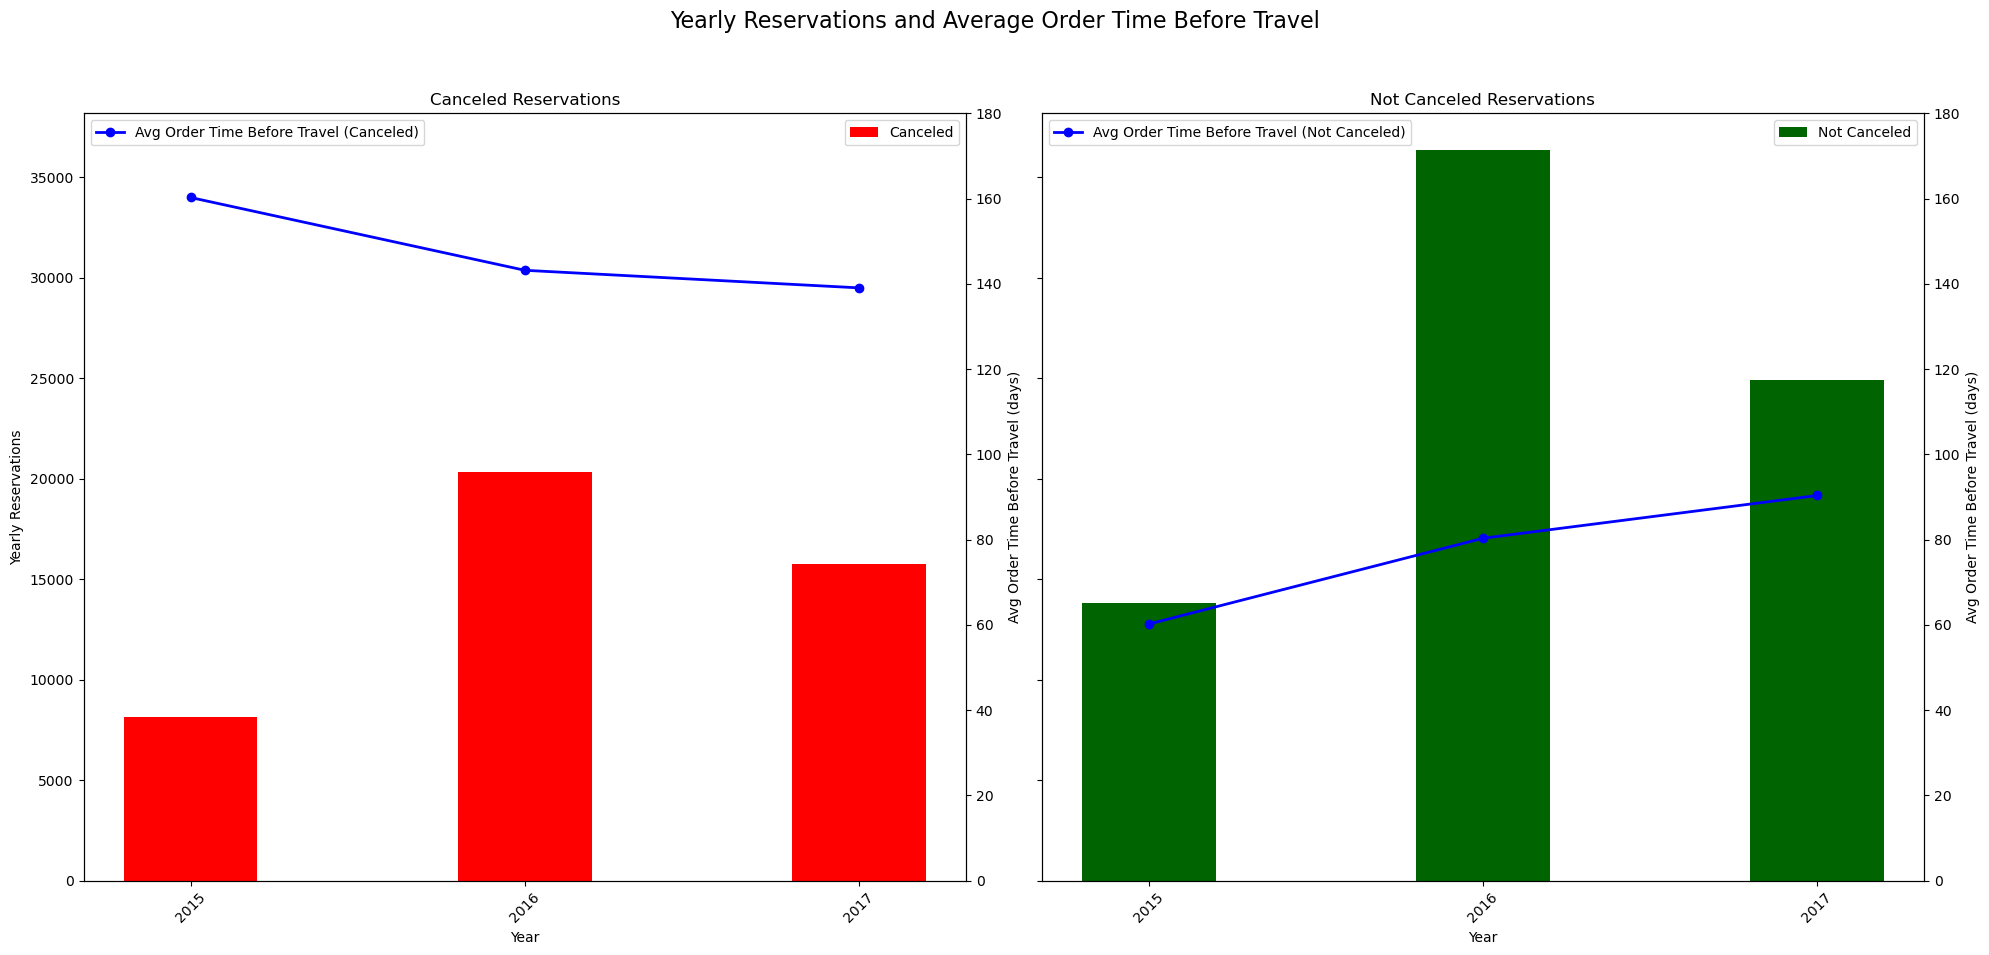

In [9]:
# Load the data
data = pd.read_csv('reservationsN.csv')

# Extract year from the date
data['Year'] = pd.to_datetime(data['CalculatedDate']).dt.year

# Group by Year and Cancel status to get the count of reservations
yearly_reservations = data.groupby(['Year', 'Cancel']).size().unstack(fill_value=0)

# Rename the columns for easier access
yearly_reservations.columns = ['Not Canceled', 'Canceled']

# Group by Year and Cancel status to get the average TTT for canceled and not canceled separately
yearly_avg_ttt_canceled = data[data['Cancel'] == 'yes'].groupby('Year')['TTT'].mean()
yearly_avg_ttt_not_canceled = data[data['Cancel'] == 'no'].groupby('Year')['TTT'].mean()

# Determine the common y-axis limits for TTT
ttt_min = 0
ttt_max = 180

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Bar plot for canceled reservations
bar_width = 0.4
years = yearly_reservations.index
indices = range(len(years))

# Plotting Canceled Reservations
ax1.bar(indices, yearly_reservations['Canceled'], bar_width, label='Canceled', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Yearly Reservations')
ax1.set_xticks(indices)
ax1.set_xticklabels(years.astype(int), rotation=45)
ax1.set_title('Canceled Reservations')
ax1.legend()

# Create a secondary y-axis to plot the line chart for average TTT (canceled)
ax1_twin = ax1.twinx()
ax1_twin.plot(indices, yearly_avg_ttt_canceled, color='blue', marker='o', linewidth=2, label='Avg Order Time Before Travel (Canceled)')
ax1_twin.set_ylabel('Avg Order Time Before Travel (days)')
ax1_twin.set_ylim(ttt_min, ttt_max)
ax1_twin.legend(loc='upper left')

# Plotting Not Canceled Reservations
ax2.bar(indices, yearly_reservations['Not Canceled'], bar_width, label='Not Canceled', color='darkgreen')
ax2.set_xlabel('Year')
ax2.set_xticks(indices)
ax2.set_xticklabels(years.astype(int), rotation=45)
ax2.set_title('Not Canceled Reservations')
ax2.legend()

# Create a secondary y-axis to plot the line chart for average TTT (not canceled)
ax2_twin = ax2.twinx()
ax2_twin.plot(indices, yearly_avg_ttt_not_canceled, color='blue', marker='o', linewidth=2, label='Avg Order Time Before Travel (Not Canceled)')
ax2_twin.set_ylabel('Avg Order Time Before Travel (days)')
ax2_twin.set_ylim(ttt_min, ttt_max)
ax2_twin.legend(loc='upper left')

# Set the overall title for the figure
fig.suptitle('Yearly Reservations and Average Order Time Before Travel', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


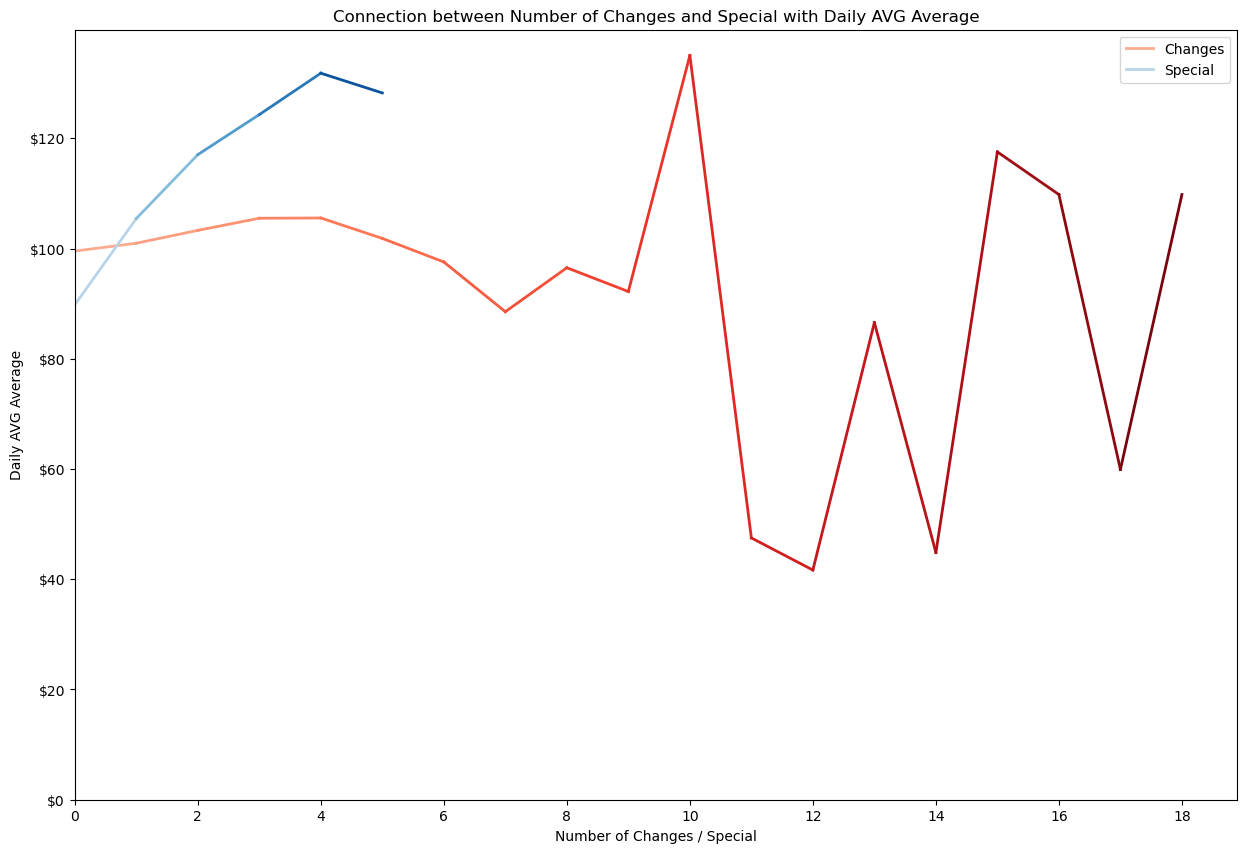

In [10]:
# Load the data
data = pd.read_csv('reservationsN.csv')

# Filter the data for "Check-Out" only
filtered_data = data[data['Stat'] == 'Check-Out']

# Remove rows where 'Changes' are 20 or 21
filtered_data = filtered_data[~filtered_data['Changes'].isin([20, 21])]

# Group by 'Changes' and 'Special' to calculate the average 'Daily AVG'
avg_dailyavg_by_changes = filtered_data.groupby('Changes')['Daily AVG'].mean()
avg_dailyavg_by_special = filtered_data.groupby('Special')['Daily AVG'].mean()

# Generate colors for the gradient lines
changes_colors = plt.cm.Reds(np.linspace(0.3, 1, len(avg_dailyavg_by_changes)))
special_colors = plt.cm.Blues(np.linspace(0.3, 1, len(avg_dailyavg_by_special)))

# Function to format the y-axis as currency
def currency_formatter(x, pos):
    return f'${x:,.0f}'

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Plot 'Changes' vs 'Daily AVG'
for i in range(len(avg_dailyavg_by_changes)-1):
    ax.plot(avg_dailyavg_by_changes.index[i:i+2], avg_dailyavg_by_changes.values[i:i+2], color=changes_colors[i], lw=2, label='Changes' if i == 0 else "")

# Plot 'Special' vs 'Daily AVG'
for i in range(len(avg_dailyavg_by_special)-1):
    ax.plot(avg_dailyavg_by_special.index[i:i+2], avg_dailyavg_by_special.values[i:i+2], color=special_colors[i], lw=2, label='Special' if i == 0 else "")

# Set x-axis to show integer values only
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set y-axis to start at 0 and format as currency
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Add labels and title
ax.set_xlabel('Number of Changes / Special')
ax.set_ylabel('Daily AVG Average')
ax.set_title('Connection between Number of Changes and Special with Daily AVG Average')

# Add legend
ax.legend()

# Show the plot
plt.show()


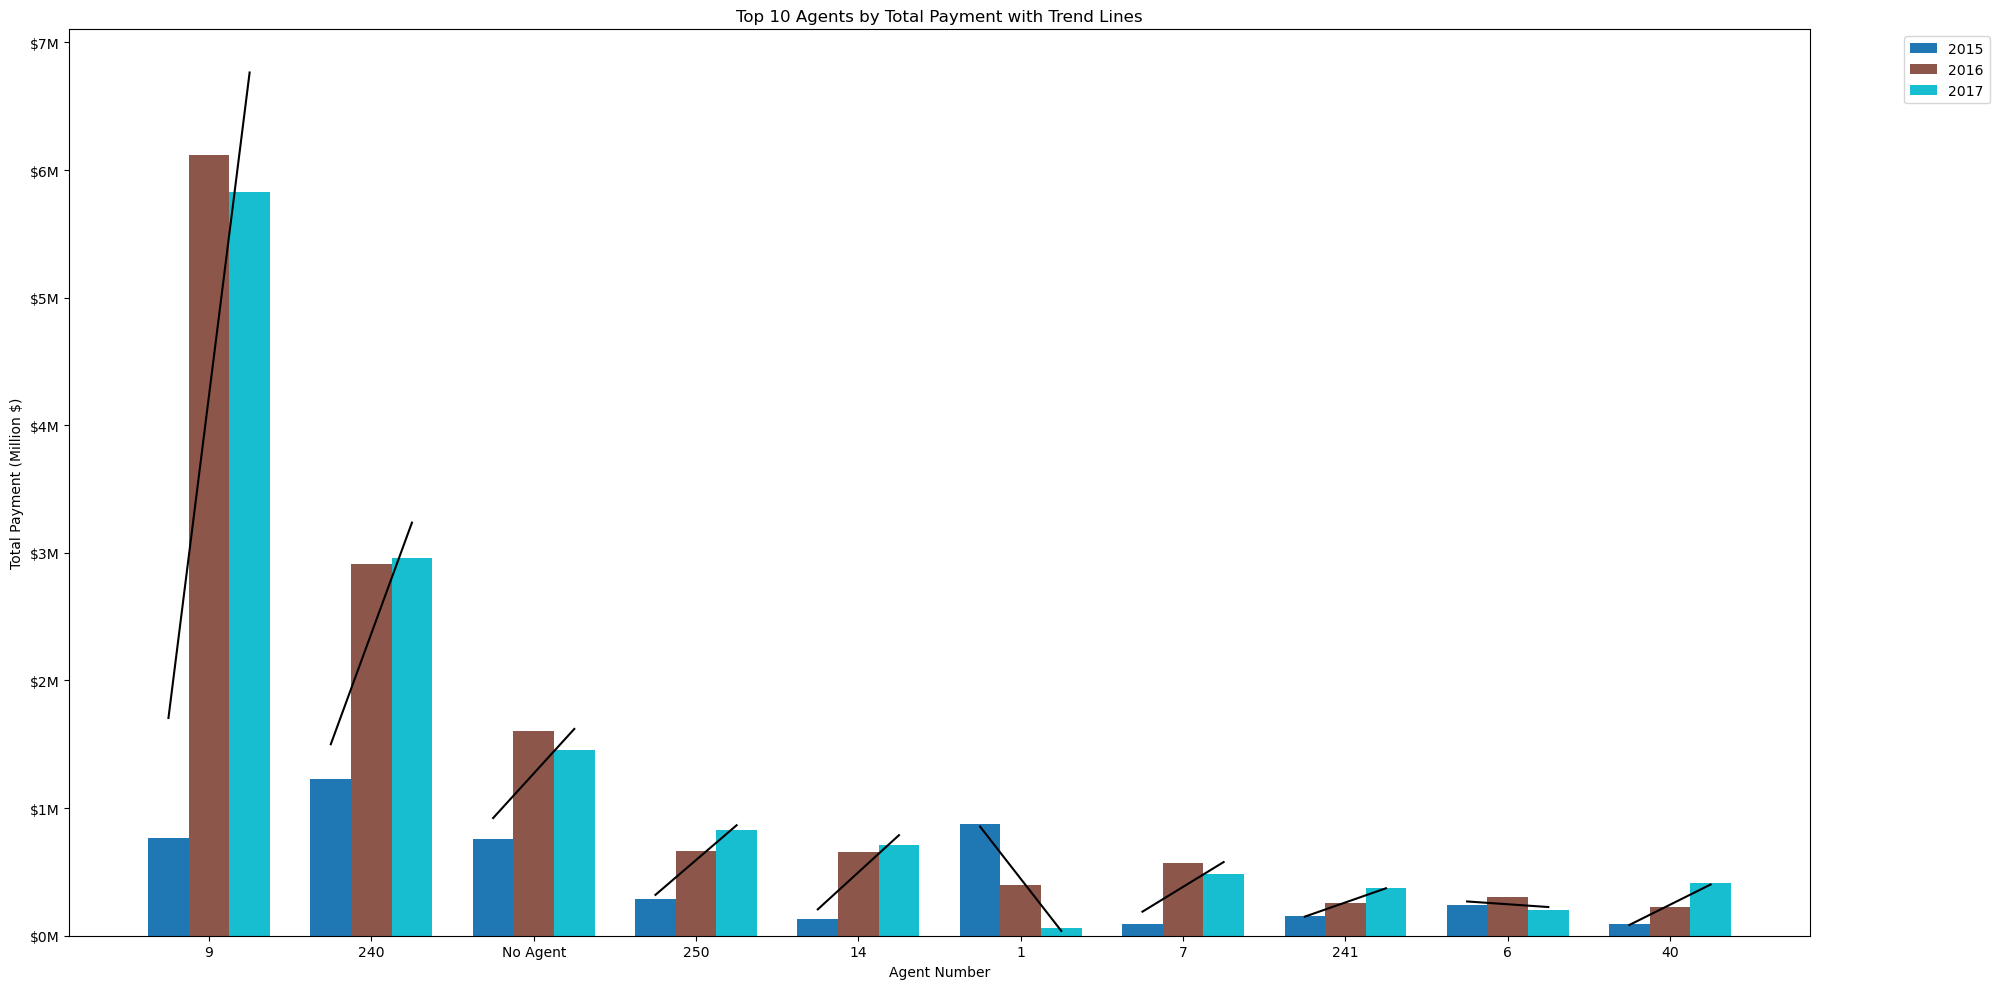

In [11]:
# Load the data
data = pd.read_csv('reservationsN.csv')

# Handle null values in 'Agent Nr' by treating them as "No Agent"
data['Agent Nr'].fillna('No Agent', inplace=True)

# Extract year from the date
data['Year'] = pd.to_datetime(data['CalculatedDate']).dt.year

# Calculate the total payment for each agent
total_payment_by_agent = data.groupby('Agent Nr')['TotalPayment'].sum()

# Get the top 10 agents by total payment
top_10_agents = total_payment_by_agent.nlargest(10).index

# Filter the data to include only the top 10 agents
filtered_data = data[data['Agent Nr'].isin(top_10_agents)]

# Group by Agent Nr and Year to get the total payment for each year
yearly_payment_by_agent = filtered_data.groupby(['Agent Nr', 'Year'])['TotalPayment'].sum().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))

# Define colors for each year
years = yearly_payment_by_agent.columns
colors = plt.cm.tab10(np.linspace(0, 1, len(years)))

# Bar width
bar_width = 0.2
n_years = len(years)

# Function to format the y-axis as currency in millions of dollars
def currency_formatter(x, pos):
    return f'${x:,.0f}M'

# Plot bars and trend lines for each agent
for i, agent in enumerate(top_10_agents):
    agent_data = yearly_payment_by_agent.loc[agent]
    x = np.arange(len(agent_data))
    
    # Calculate the position for each bar
    bar_positions = x * bar_width + i * (n_years + 1) * bar_width
    
    # Plot bars for each year
    for j, year in enumerate(years):
        ax.bar(bar_positions[j], agent_data[year] / 1e6, width=bar_width, color=colors[j], label=int(year) if i == 0 else "")
    
    # Plot trend line for each agent
    z = np.polyfit(bar_positions, agent_data / 1e6, 1)
    p = np.poly1d(z)
    ax.plot(bar_positions, p(bar_positions), color='black')

# Set x-axis labels
agent_positions = np.arange(len(top_10_agents)) * (n_years + 1) * bar_width + bar_width * (n_years - 1) / 2
ax.set_xticks(agent_positions)
ax.set_xticklabels([str(int(agent)) if agent != 'No Agent' else 'No Agent' for agent in top_10_agents])

# Set labels and title
ax.set_xlabel('Agent Number')
ax.set_ylabel('Total Payment (Million $)')
ax.set_title('Top 10 Agents by Total Payment with Trend Lines')

# Format y-axis as currency in millions of dollars
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


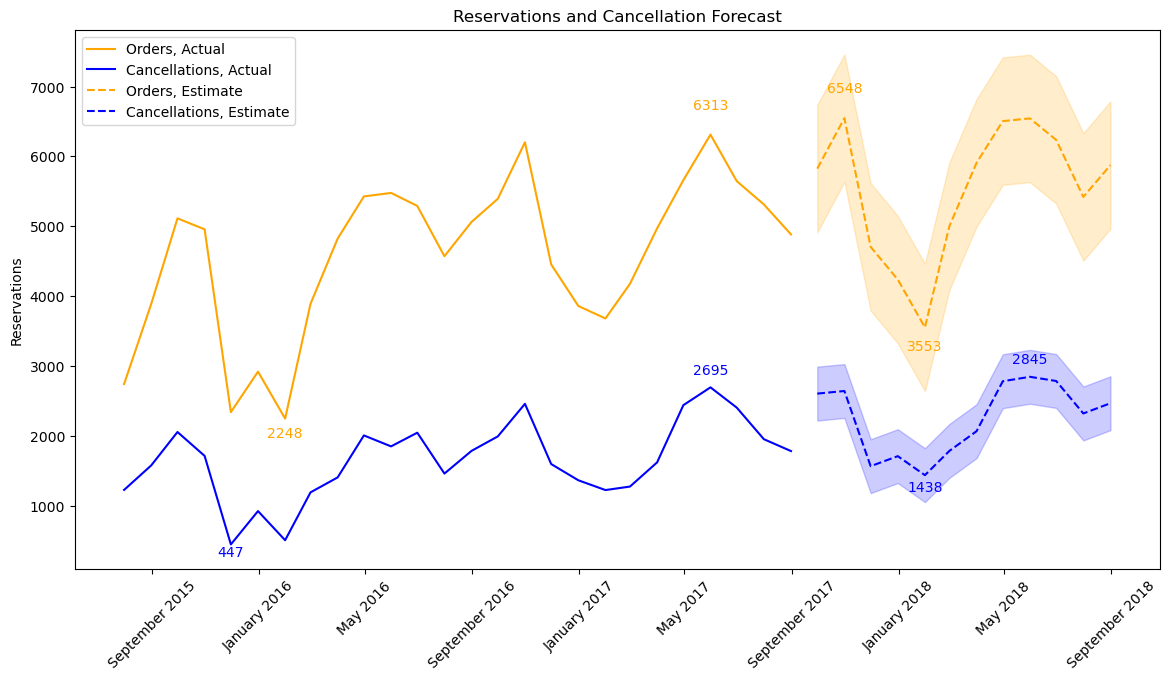

In [13]:

# Load the data
data = pd.read_csv('reservationsN.csv')

# Convert the 'CalculatedDate' to datetime
data['CalculatedDate'] = pd.to_datetime(data['CalculatedDate'])

# Set 'CalculatedDate' as the index
data.set_index('CalculatedDate', inplace=True)

# Resample data to monthly frequency and sum the values
monthly_data = data.resample('M').sum(numeric_only=True)

# Ensure that the frequency is set
monthly_data = monthly_data.asfreq('M')

# Create the forecast for 'TotalOrders'
model_orders = ExponentialSmoothing(monthly_data['TotalOrders'], trend='add', seasonal='add', seasonal_periods=12)
fit_orders = model_orders.fit()
forecast_orders = fit_orders.forecast(12)

# Create the forecast for 'CancelPersentage'
model_cancellations = ExponentialSmoothing(monthly_data['CancelPersentage'], trend='add', seasonal='add', seasonal_periods=12)
fit_cancellations = model_cancellations.fit()
forecast_cancellations = fit_cancellations.forecast(12)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual data without circle markers
plt.plot(monthly_data.index, monthly_data['TotalOrders'], label='Orders, Actual', color='orange')
plt.plot(monthly_data.index, monthly_data['CancelPersentage'], label='Cancellations, Actual', color='blue')

# Plot forecasts without circle markers
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=13, freq='M')[1:]
plt.plot(forecast_index, forecast_orders, label='Orders, Estimate', color='orange', linestyle='--')
plt.plot(forecast_index, forecast_cancellations, label='Cancellations, Estimate', color='blue', linestyle='--')

# Add fill between for forecast intervals
plt.fill_between(forecast_index, forecast_orders - 1.96 * fit_orders.resid.std(), forecast_orders + 1.96 * fit_orders.resid.std(), color='orange', alpha=0.2)
plt.fill_between(forecast_index, forecast_cancellations - 1.96 * fit_cancellations.resid.std(), forecast_cancellations + 1.96 * fit_cancellations.resid.std(), color='blue', alpha=0.2)

# Function to annotate min and max values directly above and below the points
def annotate_min_max(series, label, color):
    min_value = int(series.min())
    max_value = int(series.max())
    min_index = series.idxmin()
    max_index = series.idxmax()
    plt.annotate(f'{min_value}', xy=(min_index, min_value), xytext=(min_index, min_value - 0.05 * min_value),
                 horizontalalignment='center', verticalalignment='top', color=color)
    plt.annotate(f'{max_value}', xy=(max_index, max_value), xytext=(max_index, max_value + 0.05 * max_value),
                 horizontalalignment='center', verticalalignment='bottom', color=color)

# Annotate actual data
annotate_min_max(monthly_data['TotalOrders'], 'Orders, Actual', 'orange')
annotate_min_max(monthly_data['CancelPersentage'], 'Cancellations, Actual', 'blue')

# Annotate forecasts
annotate_min_max(pd.Series(forecast_orders, index=forecast_index), 'Orders, Estimate', 'orange')
annotate_min_max(pd.Series(forecast_cancellations, index=forecast_index), 'Cancellations, Estimate', 'blue')

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))

# Add titles and labels
plt.title('Reservations and Cancellation Forecast')
# plt.xlabel('Date')
plt.ylabel('Reservations')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


10:22:33 - cmdstanpy - INFO - Chain [1] start processing
10:22:33 - cmdstanpy - INFO - Chain [1] done processing
10:22:33 - cmdstanpy - INFO - Chain [1] start processing
10:22:33 - cmdstanpy - INFO - Chain [1] done processing


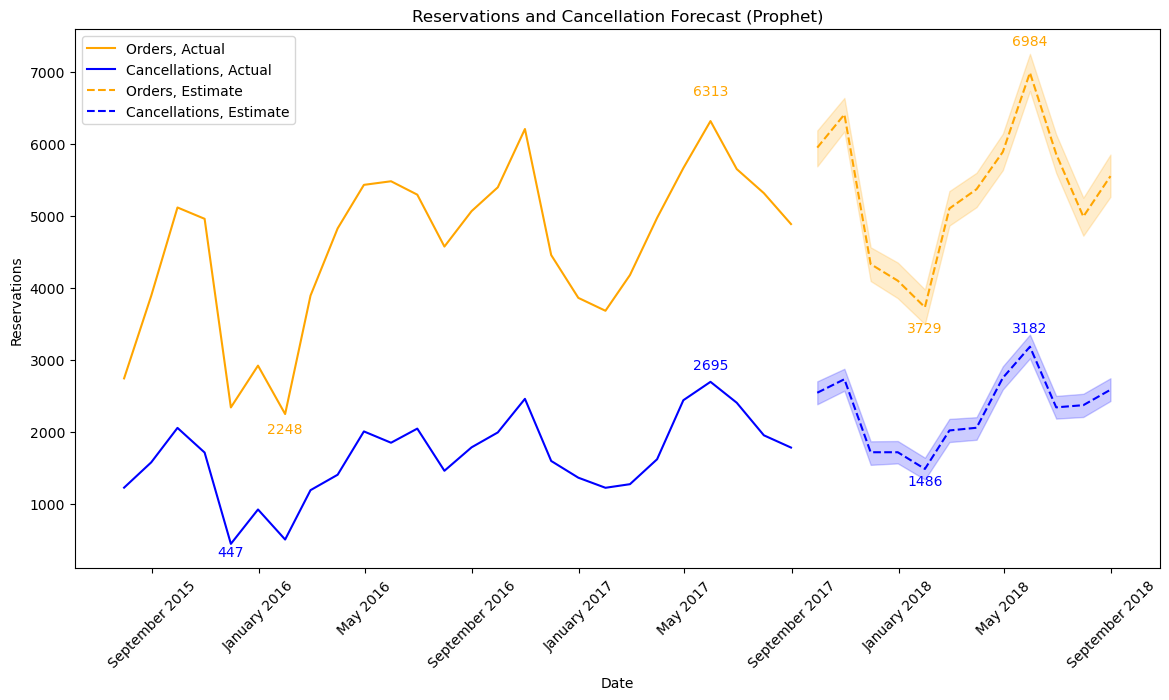

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import matplotlib.dates as mdates

# Load the data
data = pd.read_csv('reservationsN.csv')

# Convert the 'CalculatedDate' to datetime
data['CalculatedDate'] = pd.to_datetime(data['CalculatedDate'])

# Set 'CalculatedDate' as the index
data.set_index('CalculatedDate', inplace=True)

# Resample data to monthly frequency and sum the values
monthly_data = data.resample('M').sum(numeric_only=True).reset_index()

# Prepare data for Prophet
orders_data = monthly_data[['CalculatedDate', 'TotalOrders']]
orders_data.columns = ['ds', 'y']

cancellations_data = monthly_data[['CalculatedDate', 'CancelPersentage']]
cancellations_data.columns = ['ds', 'y']

# Create and fit the Prophet model for orders
orders_model = Prophet()
orders_model.fit(orders_data)

# Create and fit the Prophet model for cancellations
cancellations_model = Prophet()
cancellations_model.fit(cancellations_data)

# Make a future dataframe for 12 months
future_orders = orders_model.make_future_dataframe(periods=12, freq='M')
future_cancellations = cancellations_model.make_future_dataframe(periods=12, freq='M')

# Forecast the data
forecast_orders = orders_model.predict(future_orders)
forecast_cancellations = cancellations_model.predict(future_cancellations)

# Split the forecast data to match the actual and future periods
forecast_orders_actual = forecast_orders[forecast_orders['ds'] <= orders_data['ds'].max()]
forecast_orders_future = forecast_orders[forecast_orders['ds'] > orders_data['ds'].max()]

forecast_cancellations_actual = forecast_cancellations[forecast_cancellations['ds'] <= cancellations_data['ds'].max()]
forecast_cancellations_future = forecast_cancellations[forecast_cancellations['ds'] > cancellations_data['ds'].max()]

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(orders_data['ds'], orders_data['y'], label='Orders, Actual', color='orange')
plt.plot(cancellations_data['ds'], cancellations_data['y'], label='Cancellations, Actual', color='blue')

# Plot forecasts
plt.plot(forecast_orders_future['ds'], forecast_orders_future['yhat'], label='Orders, Estimate', color='orange', linestyle='--')
plt.plot(forecast_cancellations_future['ds'], forecast_cancellations_future['yhat'], label='Cancellations, Estimate', color='blue', linestyle='--')

# Add fill between for forecast intervals
plt.fill_between(forecast_orders_future['ds'], forecast_orders_future['yhat_lower'], forecast_orders_future['yhat_upper'], color='orange', alpha=0.2)
plt.fill_between(forecast_cancellations_future['ds'], forecast_cancellations_future['yhat_lower'], forecast_cancellations_future['yhat_upper'], color='blue', alpha=0.2)

# Function to annotate min and max values directly above and below the points
def annotate_min_max(series, label, color):
    min_value = int(series['y'].min())
    max_value = int(series['y'].max())
    min_index = series['y'].idxmin()
    max_index = series['y'].idxmax()
    plt.annotate(f'{min_value}', xy=(series['ds'][min_index], min_value), xytext=(series['ds'][min_index], min_value - 0.05 * min_value),
                 horizontalalignment='center', verticalalignment='top', color=color)
    plt.annotate(f'{max_value}', xy=(series['ds'][max_index], max_value), xytext=(series['ds'][max_index], max_value + 0.05 * max_value),
                 horizontalalignment='center', verticalalignment='bottom', color=color)

# Annotate actual data
annotate_min_max(orders_data, 'Orders, Actual', 'orange')
annotate_min_max(cancellations_data, 'Cancellations, Actual', 'blue')

# Annotate forecasts
forecast_orders_min_max = forecast_orders_future[['ds', 'yhat']].copy()
forecast_orders_min_max.columns = ['ds', 'y']
annotate_min_max(forecast_orders_min_max, 'Orders, Estimate', 'orange')

forecast_cancellations_min_max = forecast_cancellations_future[['ds', 'yhat']].copy()
forecast_cancellations_min_max.columns = ['ds', 'y']
annotate_min_max(forecast_cancellations_min_max, 'Cancellations, Estimate', 'blue')

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))

# Add titles and labels
plt.title('Reservations and Cancellation Forecast (Prophet)')
plt.xlabel('Date')
plt.ylabel('Reservations')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


Epoch 1/80


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 - 2s - 157ms/step - loss: 0.1380
Epoch 2/80
14/14 - 0s - 11ms/step - loss: 0.0764
Epoch 3/80
14/14 - 0s - 12ms/step - loss: 0.0461
Epoch 4/80
14/14 - 0s - 13ms/step - loss: 0.0539
Epoch 5/80
14/14 - 0s - 11ms/step - loss: 0.0471
Epoch 6/80
14/14 - 0s - 12ms/step - loss: 0.0568
Epoch 7/80
14/14 - 0s - 12ms/step - loss: 0.0497
Epoch 8/80
14/14 - 0s - 12ms/step - loss: 0.0483
Epoch 9/80
14/14 - 0s - 12ms/step - loss: 0.0509
Epoch 10/80
14/14 - 0s - 13ms/step - loss: 0.0552
Epoch 11/80
14/14 - 0s - 11ms/step - loss: 0.0560
Epoch 12/80
14/14 - 0s - 12ms/step - loss: 0.0477
Epoch 13/80
14/14 - 0s - 14ms/step - loss: 0.0473
Epoch 14/80
14/14 - 0s - 13ms/step - loss: 0.0489
Epoch 15/80
14/14 - 0s - 13ms/step - loss: 0.0511
Epoch 16/80
14/14 - 0s - 14ms/step - loss: 0.0458
Epoch 17/80
14/14 - 0s - 13ms/step - loss: 0.0450
Epoch 18/80
14/14 - 0s - 12ms/step - loss: 0.0519
Epoch 19/80
14/14 - 0s - 11ms/step - loss: 0.0465
Epoch 20/80
14/14 - 0s - 11ms/step - loss: 0.0427
Epoch 21/80
14/14 -

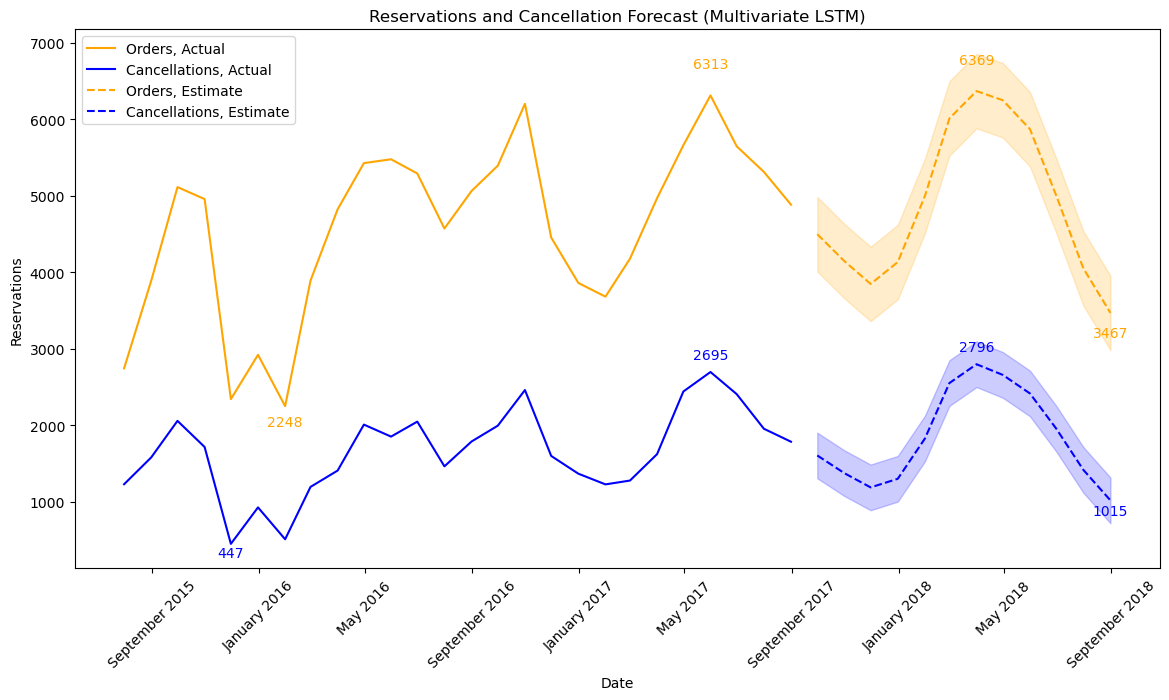

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

# Load the data
data = pd.read_csv('reservationsN.csv')

# Convert the 'CalculatedDate' to datetime
data['CalculatedDate'] = pd.to_datetime(data['CalculatedDate'])

# Set 'CalculatedDate' as the index
data.set_index('CalculatedDate', inplace=True)

# Resample data to monthly frequency and sum the values
monthly_data = data.resample('M').sum(numeric_only=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_data[['TotalOrders', 'CancelPersentage']])

# Prepare the dataset for LSTM
def create_multivariate_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Set time step
time_step = 12

# Create multivariate dataset
X, y = create_multivariate_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 2)

# Create the LSTM model
def create_multivariate_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 2)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(2))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the multivariate model
model = create_multivariate_lstm_model()
model.fit(X, y, epochs=80, batch_size=1, verbose=2)

# Predict future values using the trained model
def predict_future_multivariate(model, data, steps):
    future_values = []
    current_data = data[-time_step:].reshape(1, time_step, 2)
    for _ in range(steps):
        prediction = model.predict(current_data)[0]
        future_values.append(prediction)
        current_data = np.append(current_data[:, 1:, :], [[prediction]], axis=1)
    return np.array(future_values)

# Predict future values
forecast = predict_future_multivariate(model, scaled_data, 12)

# Inverse transform the data
forecast = scaler.inverse_transform(forecast)

# Split the forecasts into separate arrays
forecast_orders = forecast[:, 0]
forecast_cancellations = forecast[:, 1]

# Calculate the standard deviation for the forecast range
orders_std = np.std(forecast_orders) * 0.5
cancellations_std = np.std(forecast_cancellations) * 0.5

# Create a future date range
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=13, freq='M')[1:]

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(monthly_data.index, monthly_data['TotalOrders'], label='Orders, Actual', color='orange')
plt.plot(monthly_data.index, monthly_data['CancelPersentage'], label='Cancellations, Actual', color='blue')

# Plot forecasts
plt.plot(forecast_index, forecast_orders, label='Orders, Estimate', color='orange', linestyle='--')
plt.plot(forecast_index, forecast_cancellations, label='Cancellations, Estimate', color='blue', linestyle='--')

# Plot the forecast range
plt.fill_between(forecast_index, (forecast_orders - orders_std), (forecast_orders + orders_std), color='orange', alpha=0.2)
plt.fill_between(forecast_index, (forecast_cancellations - cancellations_std), (forecast_cancellations + cancellations_std), color='blue', alpha=0.2)

# Function to annotate min and max values directly above and below the points
def annotate_min_max(series, dates, label, color):
    min_value = int(series.min())
    max_value = int(series.max())
    min_index = series.argmin()
    max_index = series.argmax()
    plt.annotate(f'{min_value}', xy=(dates[min_index], min_value), xytext=(dates[min_index], min_value - 0.05 * min_value),
                 horizontalalignment='center', verticalalignment='top', color=color)
    plt.annotate(f'{max_value}', xy=(dates[max_index], max_value), xytext=(dates[max_index], max_value + 0.05 * max_value),
                 horizontalalignment='center', verticalalignment='bottom', color=color)

# Annotate actual data
annotate_min_max(monthly_data['TotalOrders'], monthly_data.index, 'Orders, Actual', 'orange')
annotate_min_max(monthly_data['CancelPersentage'], monthly_data.index, 'Cancellations, Actual', 'blue')

# Annotate forecasts
annotate_min_max(pd.Series(forecast_orders), forecast_index, 'Orders, Estimate', 'orange')
annotate_min_max(pd.Series(forecast_cancellations), forecast_index, 'Cancellations, Estimate', 'blue')

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))

# Add titles and labels
plt.title('Reservations and Cancellation Forecast (Multivariate LSTM)')
plt.xlabel('Date')
plt.ylabel('Reservations')
plt.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()
